<a href="https://colab.research.google.com/github/isiri01/EN3160---Image-Processing-and-Machine-Vision/blob/main/Assignment03_210732H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03  -  Withanawasam I. A  210732H

## Question 01

### 01.Training without adding the adding the middle layer




100%|██████████| 170M/170M [00:05<00:00, 30.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9768964141011238
Epoch 2/20, Loss: 0.9498089488148689
Epoch 3/20, Loss: 0.9360747361183166
Epoch 4/20, Loss: 0.9275211998224259
Epoch 5/20, Loss: 0.9215844964385033
Epoch 6/20, Loss: 0.917182621896267
Epoch 7/20, Loss: 0.9137717428803444
Epoch 8/20, Loss: 0.9110454975366592
Epoch 9/20, Loss: 0.9088178619146347
Epoch 10/20, Loss: 0.9069656866788864
Epoch 11/20, Loss: 0.905406334400177
Epoch 12/20, Loss: 0.9040793333053588
Epoch 13/20, Loss: 0.9029409288764
Epoch 14/20, Loss: 0.9019578450918198
Epoch 15/20, Loss: 0.9011040740609169
Epoch 16/20, Loss: 0.9003593390583992
Epoch 17/20, Loss: 0.8997069072723388
Epoch 18/20, Loss: 0.8991336208581925
Epoch 19/20, Loss: 0.8986283649802208
Epoch 20/20, Loss: 0.8981819064617157


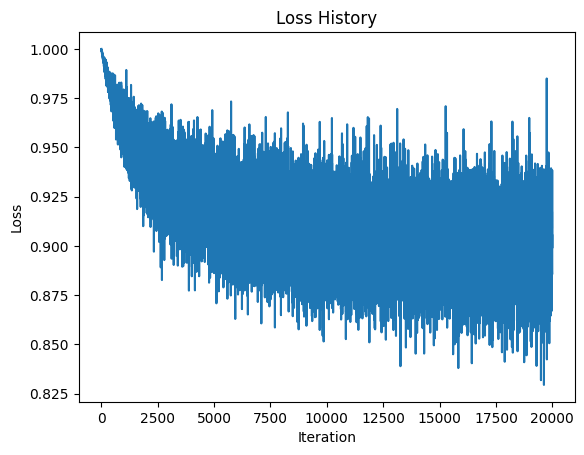

Training accuracy: 32.21%
Test accuracy: 32.40%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")



### 02. Training the new network with added middle layer

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.3027601494789125
Epoch 2/10, Loss: 2.3027486407756808
Epoch 3/10, Loss: 2.302729219198227
Epoch 4/10, Loss: 2.30273184299469
Epoch 5/10, Loss: 2.3027284030914306
Epoch 6/10, Loss: 2.302679541349411
Epoch 7/10, Loss: 2.302698979616165
Epoch 8/10, Loss: 2.3026803209781646
Epoch 9/10, Loss: 2.302671545743942
Epoch 10/10, Loss: 2.3026633439064024


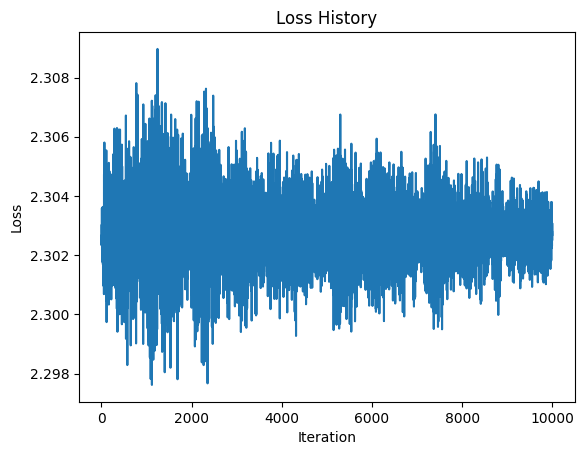

Training accuracy: 10.00%
Test accuracy: 10.00%


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters with Middle Layer
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Size of the hidden layer - added middle layer
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for a two-layer network
w1 = torch.randn(Din, H) * std
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std
b2 = torch.zeros(K)

# Hyperparameters
epochs = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop with Manual Cross-Entropy Calculation
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer with sigmoid activation
        logits = hidden_layer.mm(w2) + b2  # Output layer (logits)

        # Step 1: Apply Softmax to get probabilities
        probs = torch.softmax(logits, dim=1)

        # Step 2: Calculate manual cross-entropy loss
        labels_encoded = torch.nn.functional.one_hot(labels, num_classes=K).float()
        correct_log_probs = -torch.sum(labels_encoded * torch.log(probs + 1e-9)) / Ntr
        loss = correct_log_probs + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = probs  # Softmax gradients
        dy_pred[range(Ntr), labels] -= 1  # Subtract 1 from the correct class indices
        dy_pred /= Ntr

        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dhidden = dy_pred.mm(w2.t()) * hidden_layer * (1 - hidden_layer)  # Backpropagate through sigmoid
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Even in the presence of cross-entropy loss, the test accuracy decreased from 32% to 10% when a middle layer with 100 nodes was included.

There were probably a number of reasons for this decline. When a hidden layer is added, the model becomes more complex, which, if not properly tuned, can result in either overfitting or underfitting.The model might not have been able to properly adjust to the additional layer if it had only been trained for 10 epochs.


## Question 02

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Instantiate the network, define loss and optimizer
net = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 4. Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}, Training accuracy: {train_acc:.2f}%")

# 5. Testing the Network
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 505kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.90MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10, Loss: 0.2371, Training accuracy: 92.98%
Epoch 2/10, Loss: 0.0675, Training accuracy: 97.83%
Epoch 3/10, Loss: 0.0459, Training accuracy: 98.56%
Epoch 4/10, Loss: 0.0367, Training accuracy: 98.87%
Epoch 5/10, Loss: 0.0283, Training accuracy: 99.08%
Epoch 6/10, Loss: 0.0252, Training accuracy: 99.19%
Epoch 7/10, Loss: 0.0199, Training accuracy: 99.33%
Epoch 8/10, Loss: 0.0185, Training accuracy: 99.42%
Epoch 9/10, Loss: 0.0154, Training accuracy: 99.49%
Epoch 10/10, Loss: 0.0138, Training accuracy: 99.56%
Test accuracy: 98.79%


Got a test accuracy of 98.79 %

## Question 03

### Part 01 - Fine tuning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import time
import os
import copy

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/archive.zip (Unzipped Files)/hymenoptera'

# Create datasets and dataloaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,shuffle=True, num_workers=4)for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=30):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)


        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # training
            else:
                model.eval()   # evaluatinh

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
from torch.optim import lr_scheduler

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=30)

Epoch 0/29
----------
train Loss: 0.5609 Acc: 0.6926
val Loss: 0.1653 Acc: 0.9281

Epoch 1/29
----------
train Loss: 0.4494 Acc: 0.7910
val Loss: 0.2529 Acc: 0.9020

Epoch 2/29
----------
train Loss: 0.5605 Acc: 0.7582
val Loss: 0.2822 Acc: 0.8889

Epoch 3/29
----------
train Loss: 0.4340 Acc: 0.8115
val Loss: 0.1976 Acc: 0.9281

Epoch 4/29
----------
train Loss: 0.4854 Acc: 0.8156
val Loss: 0.3686 Acc: 0.8627

Epoch 5/29
----------
train Loss: 0.4093 Acc: 0.8402
val Loss: 0.2574 Acc: 0.9085

Epoch 6/29
----------
train Loss: 0.3741 Acc: 0.8607
val Loss: 0.2496 Acc: 0.9020

Epoch 7/29
----------
train Loss: 0.3377 Acc: 0.8648
val Loss: 0.2172 Acc: 0.9085

Epoch 8/29
----------
train Loss: 0.2530 Acc: 0.8975
val Loss: 0.2031 Acc: 0.9216

Epoch 9/29
----------
train Loss: 0.3980 Acc: 0.8361
val Loss: 0.1900 Acc: 0.9281

Epoch 10/29
----------
train Loss: 0.2658 Acc: 0.8893
val Loss: 0.1446 Acc: 0.9346

Epoch 11/29
----------
train Loss: 0.2700 Acc: 0.8852
val Loss: 0.1857 Acc: 0.9020

Ep

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


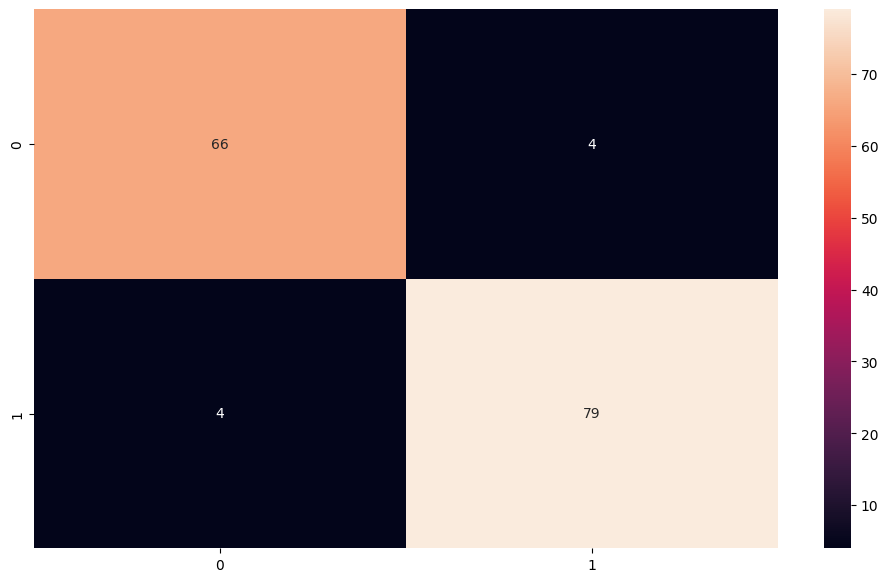

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#adding predictions and true labels to lists to use later
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in dataloaders['val']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    output = model_ft(inputs)

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)

    labels = labels.data.cpu().numpy()
    y_true.extend(labels)


# Plotting confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)
plt.show()

In order to produce two classes that correspond to the Hymenoptera dataset, I initialize the pre-trained ResNet18 model and alter its last fully connected layer. With this configuration, the model may change to precisely identify ants and bees while maintaining the traits it has learnt from ImageNet.

I updated all parameters using an SGD optimizer with a learning rate of 0.001 and momentum of 0.9, using cross-entropy loss as the criteria. To improve the model's fine-tuning over time, a learning rate scheduler decays the learning rate by 0.1 every seven epochs.

Finally got a validation accuracy around 94%.

### Part 02 - Using the network as a feature extractor

In [ ]:
import torchvision

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

#parameters of final layer are being optimized
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=30)

Epoch 0/29
----------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 0.5220 Acc: 0.7090
val Loss: 0.2921 Acc: 0.8889

Epoch 1/29
----------
train Loss: 0.4708 Acc: 0.7623
val Loss: 0.2131 Acc: 0.9150

Epoch 2/29
----------
train Loss: 0.4816 Acc: 0.7787
val Loss: 0.3306 Acc: 0.8824

Epoch 3/29
----------
train Loss: 0.4297 Acc: 0.8361
val Loss: 0.1867 Acc: 0.9412

Epoch 4/29
----------
train Loss: 0.3673 Acc: 0.8279
val Loss: 0.4380 Acc: 0.8105

Epoch 5/29
----------
train Loss: 0.5735 Acc: 0.7582
val Loss: 0.1926 Acc: 0.9346

Epoch 6/29
----------
train Loss: 0.3866 Acc: 0.8238
val Loss: 0.1788 Acc: 0.9412

Epoch 7/29
----------
train Loss: 0.3800 Acc: 0.8320
val Loss: 0.1923 Acc: 0.9150

Epoch 8/29
----------
train Loss: 0.3895 Acc: 0.8607
val Loss: 0.1836 Acc: 0.9346

Epoch 9/29
----------
train Loss: 0.4299 Acc: 0.8279
val Loss: 0.1738 Acc: 0.9477

Epoch 10/29
----------
train Loss: 0.3035 Acc: 0.8689
val Loss: 0.2066 Acc: 0.9150

Epoch 11/29
----------
train Loss: 0.3932 Acc: 0.8074
val Loss: 0.2058 Acc: 0.9216

Epoch 12/29
----------
t

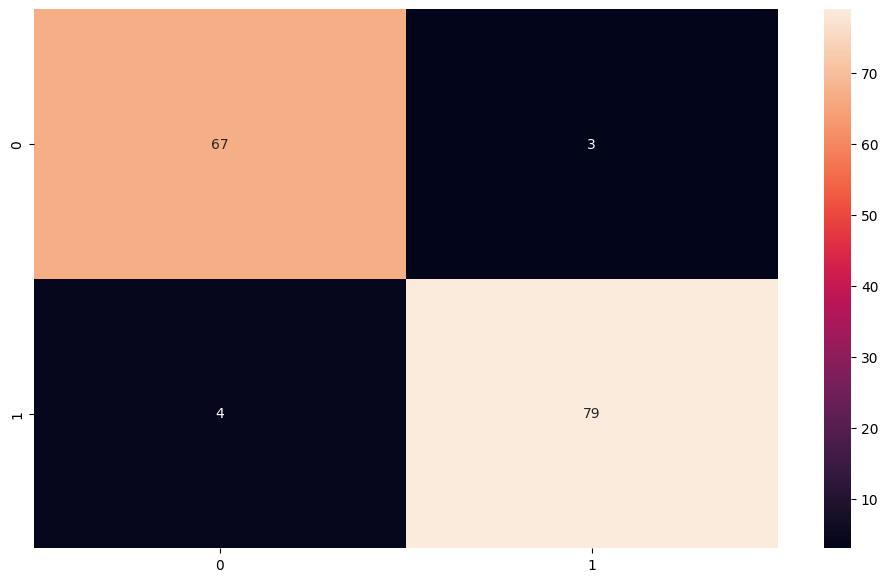

In [ ]:
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in dataloaders['val']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output = model_conv(inputs)

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)

    labels = labels.data.cpu().numpy()
    y_true.extend(labels)

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)
plt.show()

To use the pre-trained ResNet18 model only as a feature extractor, I load it and freeze all of its layers. All parameters will be set to requires_grad = False, so only the last layer—which I changed to produce two classes—will be trained. In order to categorize the Hymenoptera dataset, this method adapts the final layer while utilizing the generic features discovered on ImageNet.

Got a validation accuracy around 95%.

Because the model's pre-trained layers capture generic visual properties from a big dataset (ImageNet1K), using ResNet18 as a feature extractor increased accuracy. The risk of overfitting to the little Hymenoptera dataset is decreased by freezing these layers, which keeps the model's strong, transferable patterns. This makes it possible for the last layer to concentrate on differentiating between ants and bees, leading to a more precise and effective categorization.

